In [1]:
using OptimalControl
using NLPModelsIpopt
using Plots

In [ ]:
γ = 1
valores_iniciales = [80, 80]
x₀ = 80
v₀ = 80
tf = 10
vf = 100
A = [0 1;
    -γ 0]
B = [0; 1]


ocp = @def begin 
    t ∈ [0, tf], time
    x=(q,v) ∈ R², state
    u ∈ R, control

    q(0) == x₀
    v(0) == v₀

    derivative(x)(t) == A*x(t) + B*u(t)

    (x[2](tf) - vf)^2  → min
end


The (autonomous) optimal control problem is given by:

    t ∈ [0, tf], time
    x = ((q, v) ∈ R², state)
    u ∈ R, control
    q(0) == x₀
    v(0) == v₀
    (derivative(x))(t) == A * x(t) + B * u(t)
    ((x[2])(tf) - vf) ^ 2 → min

The (autonomous) optimal control problem is of the form:

    minimize  J(x, u) = g(x(0), x(10))

    subject to

        ẋ(t) = f(x(t), u(t)), t in [0, 10] a.e.,

        ϕl ≤ ϕ(x(0), x(10)) ≤ ϕu, 

    where x(t) = (q(t), v(t)) ∈ R² and u(t) ∈ R.

Declarations (* required):
╭────────┬────────┬──────────┬──────────┬───────────┬────────────┬─────────────╮
│ times* │ state* │ control* │ variable │ dynamics* │ objective* │ constraints │
├────────┼────────┼──────────┼──────────┼───────────┼────────────┼─────────────┤
│   V    │   V    │    V     │    X     │     V     │     V      │      V      │
╰────────┴────────┴──────────┴──────────┴───────────┴────────────┴─────────────╯


In [3]:
sol = solve(ocp)

This is Ipopt version 3.14.16, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:     3002
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        1

Total number of variables............................:      753
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      502
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  9.9800100e+03 7.99e+01 3.81e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00 

OptimalControlSolution

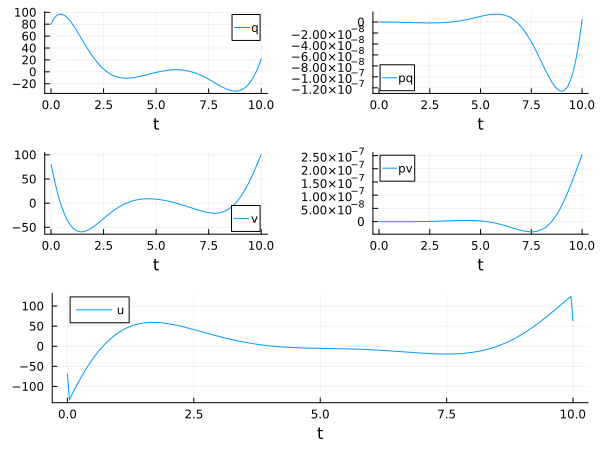

In [4]:
plot(sol; size=(600, 450))

In [5]:
sol.objective

1.595931754445643e-14